In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
source('tests.R')
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
url <- "https://raw.githubusercontent.com/Windy-Huang/DSCI-100-009-22/main/atp2017-2019.csv"
tennis_data <- read_csv(url)
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,⋯,54,42,22,15,11,15,6,3650,8,2975
2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NA,⋯,53,33,21,14,6,11,7,3775,18,2235
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667


In [5]:
tennis_selected <- tennis_data |>
    select(tourney_level, winner_name, winner_age, winner_rank, minutes, best_of)
tennis_selected

tourney_level,winner_name,winner_age,winner_rank,minutes,best_of
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A,Kei Nishikori,29.00479,9,124,3
A,Daniil Medvedev,22.88569,16,82,3
A,Kei Nishikori,29.00479,9,66,3
A,Jo Wilfried Tsonga,33.70568,239,106,3
A,Daniil Medvedev,22.88569,16,129,3
⋮,⋮,⋮,⋮,⋮,⋮
F,Grigor Dimitrov,26.49692,6,150,3
D,David Goffin,26.95414,7,119,3
D,Jo Wilfried Tsonga,32.59411,15,106,5


In [6]:
tennis_filtered_tourney_level <- tennis_selected |>
    filter(tourney_level == "G")
tennis_filtered_tourney_level 


tourney_level,winner_name,winner_age,winner_rank,minutes,best_of
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
G,Novak Djokovic,31.64956,1,123,5
G,Jo Wilfried Tsonga,33.74401,177,146,5
G,Taro Daniel,25.96304,82,92,5
G,Denis Shapovalov,19.75086,27,115,5
G,David Goffin,28.10404,22,88,5
⋮,⋮,⋮,⋮,⋮,⋮
G,Kevin Anderson,31.27995,32,206,5
G,Pablo Carreno Busta,26.13005,19,119,5
G,Rafael Nadal,31.23614,1,150,5


In [53]:
tennis_factored <- tennis_filtered_tourney_level |>
    mutate(age = ifelse(winner_age < 30, "<30", ">=30")) |>
    mutate(age = factor(age, levels=c("<30", ">=30")))
tennis_factored

tourney_level,winner_name,winner_age,winner_rank,minutes,best_of,age
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
G,Novak Djokovic,31.64956,1,123,5,>=30
G,Jo Wilfried Tsonga,33.74401,177,146,5,>=30
G,Taro Daniel,25.96304,82,92,5,<30
G,Denis Shapovalov,19.75086,27,115,5,<30
G,David Goffin,28.10404,22,88,5,<30
⋮,⋮,⋮,⋮,⋮,⋮,⋮
G,Kevin Anderson,31.27995,32,206,5,>=30
G,Pablo Carreno Busta,26.13005,19,119,5,<30
G,Rafael Nadal,31.23614,1,150,5,>=30


In [54]:
set.seed(99)
tennis_split <- initial_split(tennis_factored, prop=0.75, strata=age)
tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)
num <- tennis_training |>
    group_by(age) |>
    summarize(count=n())
num

age,count
<fct>,<int>
<30,581
>=30,366


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


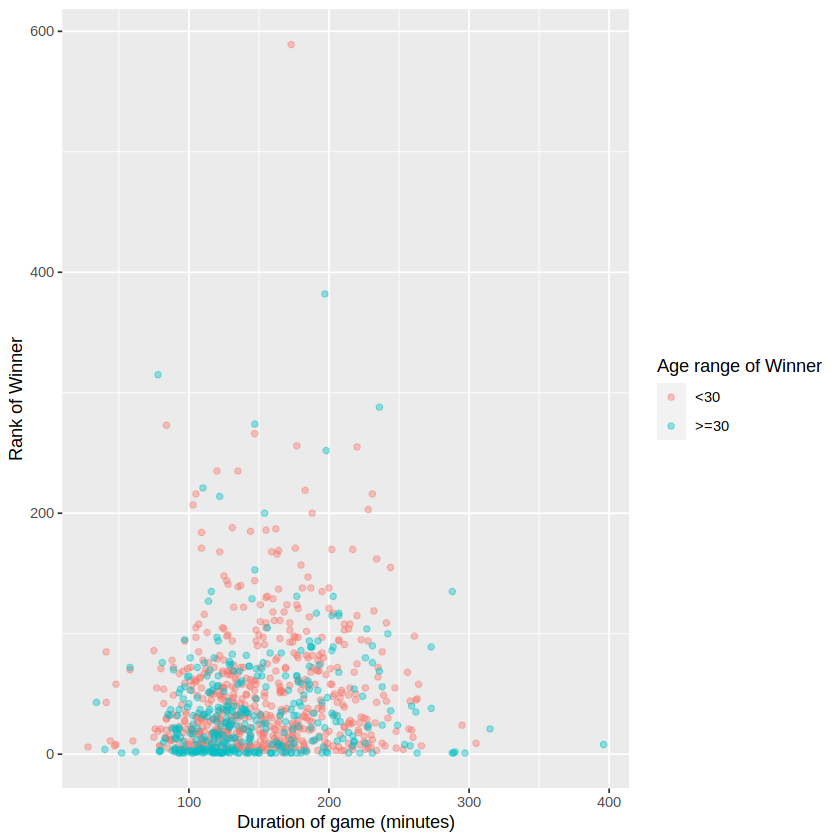

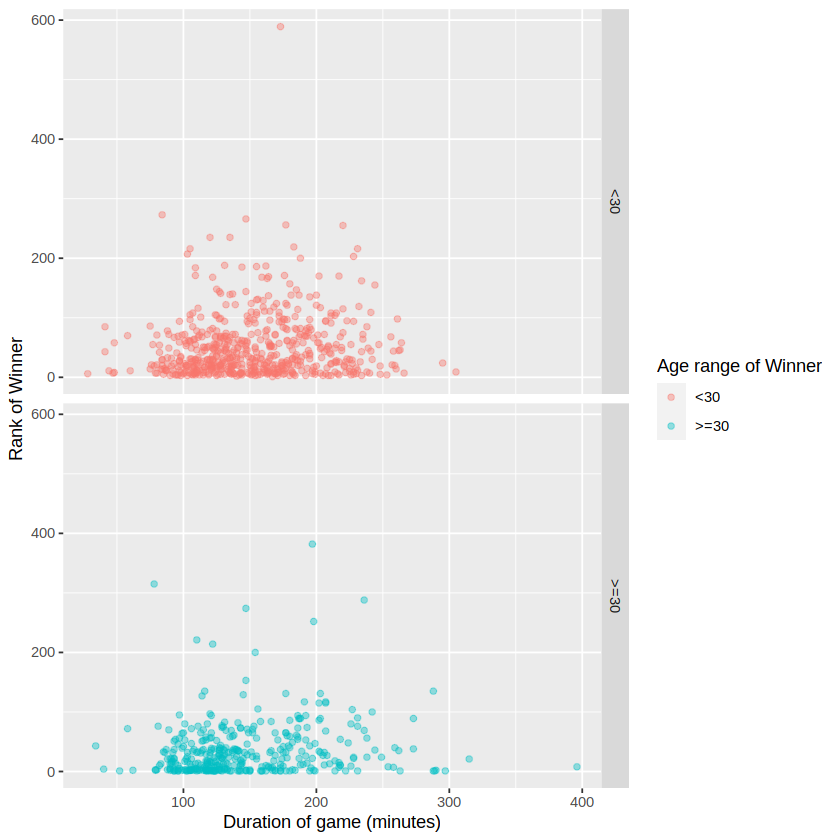

In [55]:
tennis_plot <- tennis_training |>
    ggplot(aes(x=minutes, y=winner_rank, color=age)) +
    geom_point(alpha=0.4) +
    labs(x="Duration of game (minutes)", y="Rank of Winner", color="Age range of Winner")
tennis_plot

tennis_facet <- tennis_plot +
    facet_grid(rows=vars(age))
tennis_facet